## การแบ่งกลุ่มลูกค้าห้างสรรพสินค้า

#### CustomerID = ID ที่ไม่ซ้ำที่กำหนดให้กับลูกค้า
#### Gender = เพศของลูกค้า
#### Age = อายุของลูกค้า
#### Annual Income (k$) = รายได้ต่อปีของลูกค้า
#### Spending Score (1-100) = คะแนนที่กำหนดโดยห้างสรรพสินค้าตามพฤติกรรมของลูกค้าและลักษณะการใช้จ่าย

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import *

In [3]:
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### ตรวจสอบข้อมูล

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## EDA

In [6]:
plt.style.use('bmh')

In [25]:
def hist_plot(col) :
    fig , ax = plt.subplots(1,2 , figsize=(10,4))
    sns.histplot(customers[col] , ax=ax[0])
    sns.boxplot(customers[col] , ax=ax[1])
    

#### การกระจายตัวของข้อมูล

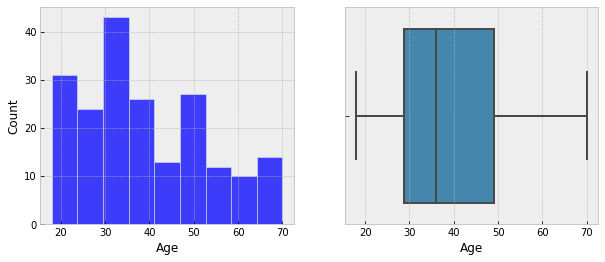

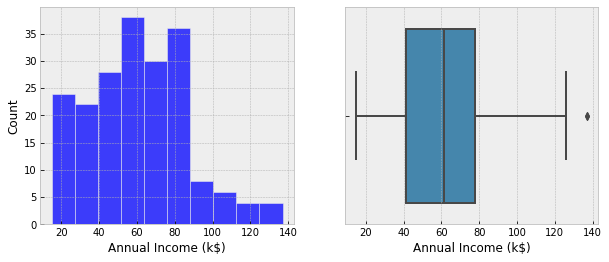

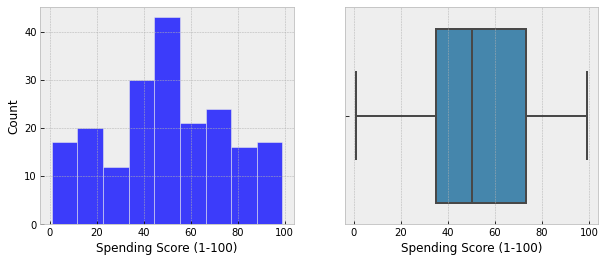

In [26]:
for i in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'] :
    hist_plot(i)

#### จำนวนลูกค้า แบ่งตามเพศ

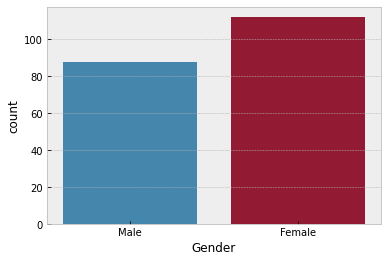

In [8]:
sns.countplot(data=customers , x='Gender');

#### การกระจายตัวของจำนวนลูกค้า แบ่งตามเพศ

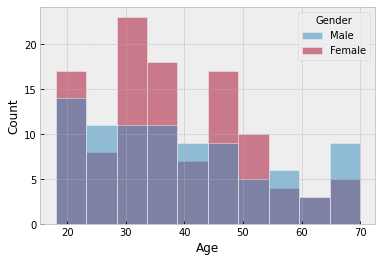

In [9]:
sns.histplot(data=customers , x='Age',hue='Gender' , bins=10);

#### ความสัมพันธ์ของแต่ละคุณสมบัติ

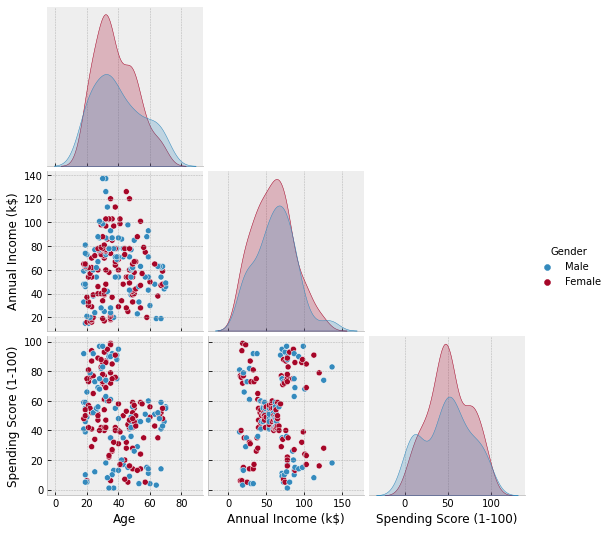

In [10]:
sns.pairplot(data=customers.drop('CustomerID' , axis=1) ,hue='Gender', corner=True);

## Data Preparation

In [11]:
data = customers.drop(['CustomerID' , 'Gender'] , axis=1) 

In [12]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [32]:
scaler = MinMaxScaler()

In [33]:
data_scaler = scaler.fit_transform(data)

## K-Mean

In [34]:
iner = []
for i in range(1,11) :
    km = KMeans(n_clusters=i)
    km.fit(data_scaler)
    iner.append(km.inertia_)

#### หาจุด Elbow

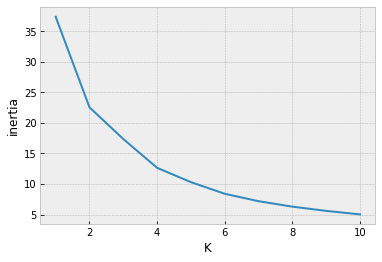

In [35]:
plt.plot(np.arange(1,11) , iner)
plt.xlabel('K')
plt.ylabel('inertia');

#### จุด Elbow ค่า K = 4

## Modeling

In [36]:
kmean = KMeans(n_clusters=4)

In [37]:
kmean.fit(data_scaler)

KMeans(n_clusters=4)

In [38]:
kmean.cluster_centers_

array([[0.14304993, 0.20491803, 0.60508414],
       [0.28605769, 0.58278689, 0.82168367],
       [0.41093117, 0.58606557, 0.1895811 ],
       [0.69201183, 0.26809584, 0.39764521]])

#### จุด Center ของ 4 กลุ่ม

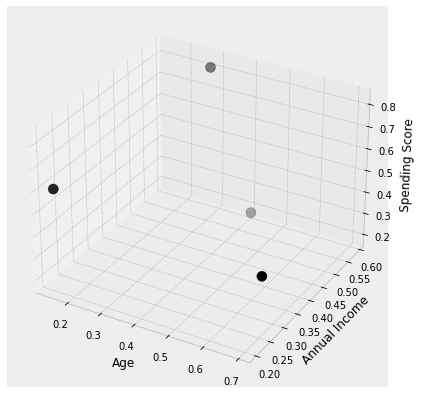

In [39]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(kmean.cluster_centers_[:,0] , kmean.cluster_centers_[:,1] , kmean.cluster_centers_[:,2] , c='black'  , s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score');

#### k-mean 4 กลุ่ม แบ่งตามสี

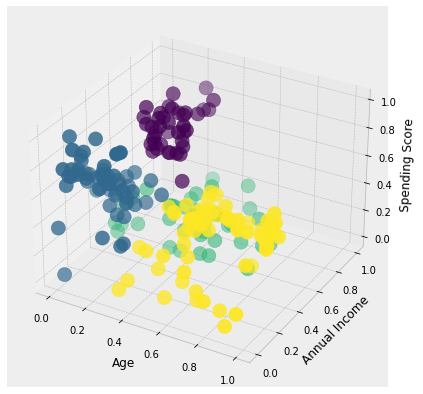

In [40]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(data_scaler[:,0] , data_scaler[:,1] , data_scaler[:,2] , c=kmean.fit_predict(data_scaler) , s=200)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score');